In [118]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [133]:
X, y = load_iris(return_X_y=True)

In [9]:
# or you can use StandartScaler from sklearn
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

In [204]:
def pca(X, n_components=2, method = 'eigen', scale = True):
    """
    This function implements Principal component analysis. 
    You can choose number of components, method of computation and whether do or skip scaling process.
    :param X: array of type np.ndarray
    :param n_components: int (2 by default) or float (if you want explicitly preserve explained variance)
    :param method: 'eigen' (by default), 'svd'
    :param scale: whether scale input data (True by default) or not
    :return: transformed input data X, n_components, cumulative variance explained
    """
    if scale == True:
        X = standardize(X)
    if method == 'eigen':
        mean_vector = np.mean(X, axis=0)
        # @ means dot product
        # of course here you can also use np.cov() function
        cov_matrix = (X - mean_vector).T @ (X - mean_vector) / (X.shape[0] - 1)
        print('Covarinace matrix is: \n%s' % cov_matrix)
        eigvalues, eigvectors = np.linalg.eig(cov_matrix)
        
    elif method == 'svd':
        _, S, Vt = np.linalg.svd(X, full_matrices=False)
        eigvalues, eigvectors = np.square(S) / (X.shape[0]-1), Vt.T
    
    print('\nEigenvectors: \n%s' % eigvectors)
    print('\nEigenvalues: \n%s' % eigvalues)
        
    # in order to make projection matrix, 
    # we should select eigvectors with the highst eigvalues
    eig_pairs = [(np.abs(eigvalues[i]), eigvectors[:,i]) for i in range(len(eigvalues))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
        
    total_var = sum(eigvalues)
    var_expl = [(i / total_var) * 100 for i in sorted(eigvalues, reverse=True)]
    cum_var_expl = np.cumsum(var_expl)
    print('\nCumulative variance: \n%s' % cum_var_expl)
    
    # if we want specific proportion of variance explained
    if isinstance(n_components, float):
        n_components *= 100
        # if all cum_var are less than desired threshold
        # use all components
        if np.all(cum_var_expl < n_components):
            n_components = cum_var_expl.shape[0]
        else:
            conditional_var = np.where(cum_var_expl>=n_components, True, False)
            n_components = np.argmax(conditional_var) + 1
    # select desired number of eigvectors 
    selected_eig_pairs = eig_pairs[:n_components]
    print('\nThese eig_pairs will be used in decomposition: \n%s' % selected_eig_pairs)
        
    if n_components > 1:
        # reshape matrix to shape (4,1)
        projection_matrix = np.hstack((selected_eig_pairs[i][1].reshape(X.shape[1], 1) for i in range(n_components)))
    else:
        projection_matrix = selected_eig_pairs[0][1].reshape(X.shape[1], 1)
    print('\nProjection matrix: \n%s' % projection_matrix)
        
    X_transformed = X @ projection_matrix
    return X_transformed, n_components, cum_var_expl

In [205]:
X_transformed, n_components, cum_var_expl = pca(X, 0.9)

Covarinace matrix is: 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Eigenvectors: 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues: 
[2.93808505 0.9201649  0.14774182 0.02085386]

Cumulative variance: 
[ 72.96244541  95.8132072   99.48212909 100.        ]

These eig_pairs will be used in decomposition: 
[(2.9380850501999936, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624879, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))]

Projection matrix: 
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


<ipython-input-204-58b3cdac4331>:46: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  projection_matrix = np.hstack((selected_eig_pairs[i][1].reshape(X.shape[1], 1) for i in range(n_components)))


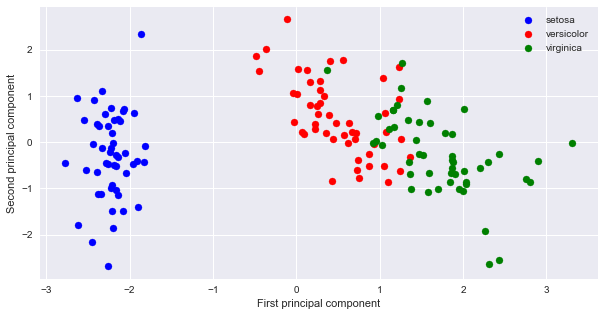

In [206]:
# plot our results
labels = ['setosa', 'versicolor', 'virginica']
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
for idx, color in zip([0, 1, 2], ('blue', 'red', 'green')):
    plt.scatter(X_transformed[y==idx, 0], X_transformed[y==idx, 1],
                    label=labels[idx], c=color)
    plt.legend()
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')